In [1]:
import os, sys
sys.path.append("../..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

import bengali_nlp.bengali_timeseries.eventDetection as ed
from bengali_nlp.bengali_timeseries.timeseries import TimeSeries

divisions = set(("mymensingh", "rangpur", "dhaka", "rajshahi", "sylhet"))

# Load in Satellite Data

In [4]:
mymensingh = pd.read_csv(os.path.join("../../satelite_data", "sentinel_mymensingh"), index_col=0)
rangpur = pd.read_csv(os.path.join("../../satelite_data", "sentinel_rangpur"), index_col=0)
dhaka = pd.read_csv(os.path.join("../../satelite_data", "sentinel_dhaka"), index_col=0)
rajshahi = pd.read_csv(os.path.join("../../satelite_data", "sentinel_rajshahi"), index_col=0)
sylhet = pd.read_csv(os.path.join("../../satelite_data", "sentinel_sylhet"), index_col=0)

In [5]:
dfs = {
    "mymensingh":mymensingh,
    "rangpur":rangpur,
    "dhaka":dhaka,
    "rajshahi":rajshahi,
    "sylhet":sylhet
}

# Creating Timeseries based on fractional flooding

In [6]:
for loc in dfs.keys():
    df = dfs[loc]
    ts = TimeSeries.from_dates(df['Dates'].apply(lambda dt: datetime.fromisoformat(dt)), 
                             weights=df['Fractional flooded Area'], 
                             date_range = (datetime(2017, 1, 1), datetime(2020, 12, 1))
                            )
    ts.save(f"timeseries_data/{loc}_fraction_flood_timeseries.pkl", overwrite = False)

NameError: name 'os' is not defined

# Detecting Events Within Timeseries

In [5]:
location = "dhaka"
ts = TimeSeries.load(f"timeseries_data/{location}_fraction_flood_timeseries.pkl")
timeseries_events = ed.SateliteTSEventDetector(ts, location=location)

In [6]:
timeseries_events.events(smoothing = 15)

[Flood event from August 27, 2017 to August 27, 2017 in Dhaka,
 Flood event from August 14, 2018 to August 14, 2018 in Dhaka,
 Flood event from July 28, 2019 to July 28, 2019 in Dhaka,
 Flood event from October 03, 2019 to October 03, 2019 in Dhaka]

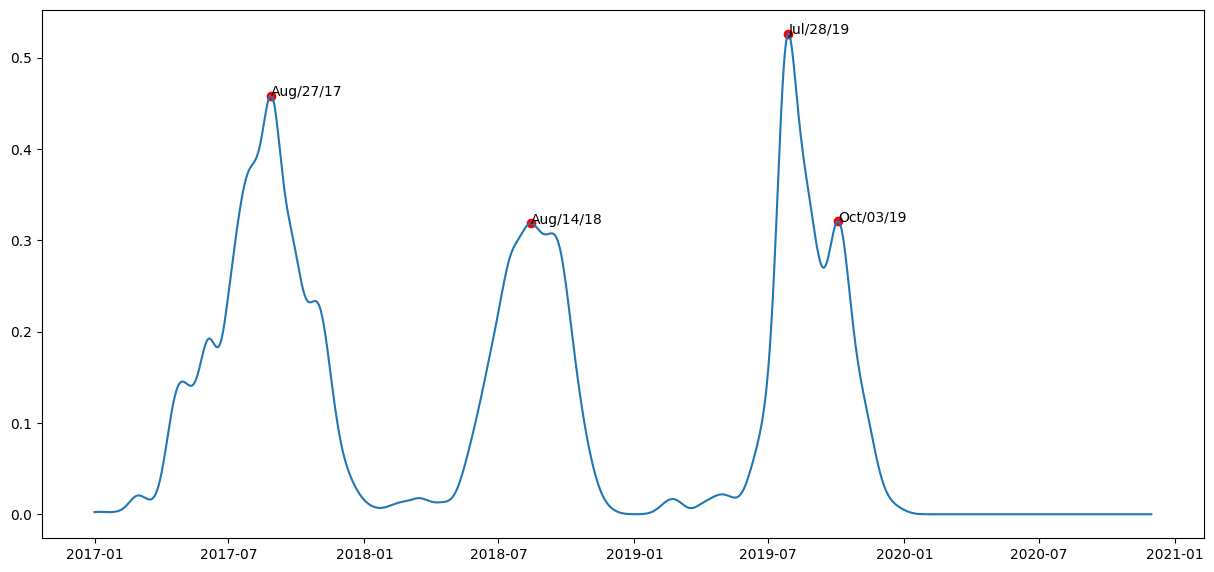

In [7]:
fig = plt.figure(figsize=(15,7), dpi= 100, edgecolor='k')
ts.smoothed(15).plot()
timeseries_events.plot()
plt.show()

In [80]:
import pickle
for division, df in dfs.items():
    ts = get_ts(df)
    fn = os.path.join("timeseries_data", f"{division}_fraction_flood_timeseries.pkl")
    with open(fn, 'wb') as f:
        pickle.dump((ts.X, ts.y), f)
    #ts.save()

TypeError: annotate() got multiple values for argument 's'

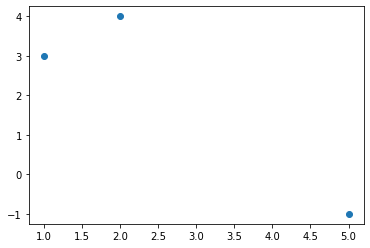

In [20]:
X = [1, 2, 5]
y = [3, 4, -1]
plt.scatter(X, y)

for a, b in zip(X, y):
    plt.annotate(a, (a, b))
plt.show()